# Hotel Booking Prediction

#### Presented by:
#### Jagath Sai Narayana Kakarparthy
#### Shraddha Waphare
#### Nisarg Negi
#### Siddhi Jadhav

***********************************************************************************************************************

## Importing the necessary modules

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


import sqlite3
from sqlite3 import Error

from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


sns.set(style="white")
plt.rc("font", size=14)
sns.set(style="whitegrid", color_codes=True)


## Functions necessary for table creation

In [6]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name):
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)
    rows = cur.fetchall()
    return rows

## Creating table

In [7]:
with open("hotel_bookings.csv", "r") as file:
    lineRead = file.readlines()
    column_names = lineRead[0].split(',')
    count =1
    data_list = [lineRead[i] for i in range(1, len(lineRead))]
    value_list = []
    for value in data_list:
        data = value.split(",")
        data.insert(0,count)
        value_list.append(tuple(data))
        count+=1
        
create_statement = """Create table HotelDemand (
    {33} text not null Primary Key,
    {0} text not null, {1} integer not null, {2} integer not null ,
    {3} text not null, {4} integer not null, {5} text not null, 
    {6} integer not null, {7} integer not null, {8} integer not null,
    {9} integer not null, {10} integer not null, {11} integer not null,
    {12} integer not null, {13} text not null, {14} text,
    {15} text not null, {16} text not null, {17} integer not null,
    {18} integer not null, {19} integer not null, {20} text not null,
    {21} text not null, {22} integer not null, {23} text not null,
    {24} integer, {25} integer, {26} integer not null,
    {27} text not null, {28} integer not null, {29} integer not null,
    {30} integer not null, {31} text not null, {32} text not null);
""".format(column_names[0],column_names[1],column_names[2],column_names[3],column_names[4],column_names[5],column_names[6],column_names[7],column_names[8],column_names[9],column_names[10],column_names[11],column_names[12], column_names[13],column_names[14],column_names[15],column_names[16],column_names[17],column_names[18],column_names[19],column_names[20],column_names[21],column_names[22],column_names[23],column_names[24],column_names[25], column_names[26],column_names[27],column_names[28],column_names[29],column_names[30],column_names[31],column_names[32],"Value_id")

insert_statement = """Insert into HotelDemand values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"""

conn = create_connection("normalized.db")
with conn:
        create_table(conn,create_statement,"HotelDemand")
        cur = conn.cursor()
        cur.executemany(insert_statement,value_list)

In [8]:
with open("hotel_bookings.csv", "r") as file:
    lineRead = file.readlines()
    column_names = lineRead[0].split(',')

conn = create_connection("normalized.db")
with conn:
    cur = conn.cursor()
    for i in column_names:
        update_query = """UPDATE HotelDemand SET {0} = NULL WHERE {0} = 'NULL';""".format(i)
        cur.execute(update_query)

In [9]:
conn = create_connection('normalized.db')
sql_statement = """select {33},{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13},{14},{15},{16},{17},{18},{19},
{20},{21},{22},{23},{24},{25},{26},{27},{28},{29},{30},{31},{32} from HotelDemand""".format(column_names[0],column_names[1],column_names[2],column_names[3],column_names[4],column_names[5],column_names[6],column_names[7],column_names[8],column_names[9],column_names[10],column_names[11],column_names[12], column_names[13],column_names[14],column_names[15],column_names[16],column_names[17],column_names[18],column_names[19],column_names[20],column_names[21],column_names[22],column_names[23],column_names[24],column_names[25], column_names[26],column_names[27],column_names[28],column_names[29],column_names[30],column_names[31],column_names[32],"Value_id")
;
df = pd.read_sql_query(sql_statement, conn)
df.head()

,Value_id,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0,342,July 2015,2015,July,27,1,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015\n
1,2,Resort Hotel,0,737,July 2015,2015,July,27,1,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015\n
2,3,Resort Hotel,0,7,July 2015,2015,July,27,1,0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015\n
3,4,Resort Hotel,0,13,July 2015,2015,July,27,1,0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015\n
4,5,Resort Hotel,0,14,July 2015,2015,July,27,1,0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015\n


In [10]:
df.shape

(119390, 34)

# EDA

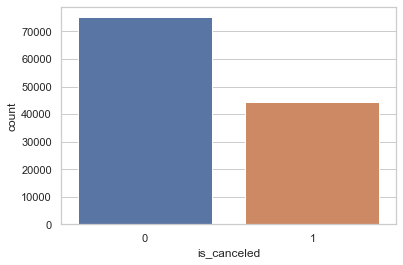

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='is_canceled',data=df)
plt.show()

## Missing value treatment

In [12]:
df.isnull().sum()

Value_id                               0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_month_year                     0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type    

In [13]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.
# "meal" contains values "Undefined", which is equal to SC.
nan_list_zero = ["children","agent","company"]
conn = create_connection("normalized.db")
with conn:
    cur = conn.cursor()
    for i in nan_list_zero:
        update_query = """UPDATE HotelDemand SET {0} = 0 WHERE {0} is null;""".format(i)
        cur.execute(update_query)
    
    update_queries = []
    update_queries.append("""UPDATE HotelDemand SET {0} = 'Unknown' WHERE {0} is null;""".format("country"))
    update_queries.append("""UPDATE HotelDemand SET {0} = 'SC' WHERE {0} = 'Undefined'""".format("meal"))
    for i in update_queries:
        cur.execute(i)

In [14]:
conn = create_connection('normalized.db')
sql_statement = """select {0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13},{14},{15},{16},{17},{18},{19},
{20},{21},{22},{23},{24},{25},{26},{27},{28},{29},{30},{31},{32} from HotelDemand""".format(column_names[0],column_names[1],column_names[2],column_names[3],column_names[4],column_names[5],column_names[6],column_names[7],column_names[8],column_names[9],column_names[10],column_names[11],column_names[12], column_names[13],column_names[14],column_names[15],column_names[16],column_names[17],column_names[18],column_names[19],column_names[20],column_names[21],column_names[22],column_names[23],column_names[24],column_names[25], column_names[26],column_names[27],column_names[28],column_names[29],column_names[30],column_names[31],column_names[32])
;
df = pd.read_sql_query(sql_statement, conn)
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,01-07-2015\n
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,01-07-2015\n
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,02-07-2015\n
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,02-07-2015\n
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,03-07-2015\n


In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_month_year                0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

## Bi-variate analysis

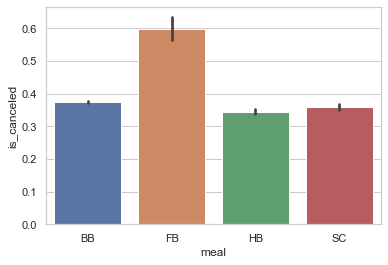

In [16]:
from numpy import mean
ax = sns.barplot(x="meal", y="is_canceled", data=df, estimator=mean)

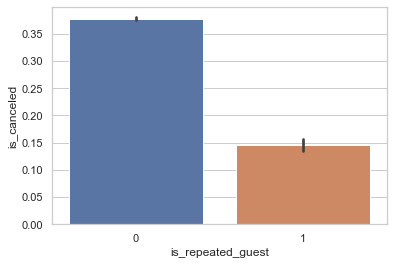

In [17]:
from numpy import mean
ax = sns.barplot(x="is_repeated_guest", y="is_canceled", data=df, estimator=mean)

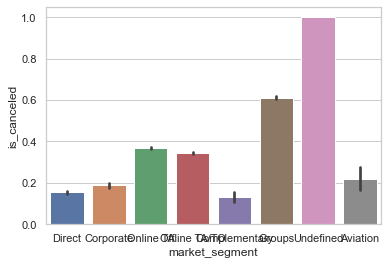

In [18]:
from numpy import mean
ax = sns.barplot(x="market_segment", y="is_canceled", data=df, estimator=mean)

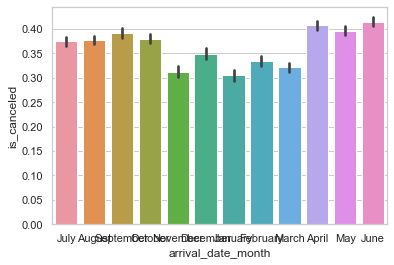

In [19]:
from numpy import mean
ax = sns.barplot(x="arrival_date_month", y="is_canceled", data=df, estimator=mean)

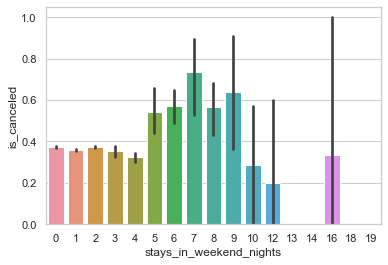

In [20]:
from numpy import mean
ax = sns.barplot(x="stays_in_weekend_nights", y="is_canceled", data=df, estimator=mean)

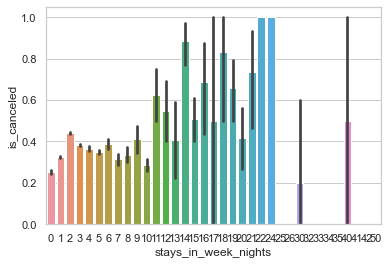

In [21]:
from numpy import mean
ax = sns.barplot(x="stays_in_week_nights", y="is_canceled", data=df, estimator=mean)

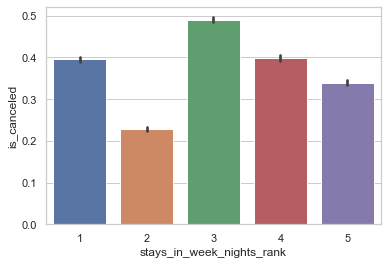

In [22]:
df['stays_in_week_nights_rank']=pd.qcut(df['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="stays_in_week_nights_rank",y="is_canceled",data=df,estimator=mean)

In [23]:
df['stay_in_week_night_grp']=np.where(df['stays_in_week_nights_rank'].isin(['1','2']),1,np.where(df['stays_in_week_nights_rank'].isin(['3','4']),2,3))
df.groupby('stay_in_week_night_grp')['is_canceled'].mean()

stay_in_week_night_grp
3    0.370416
Name: is_canceled, dtype: float64

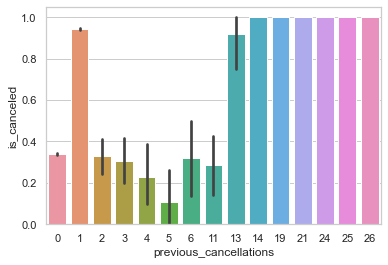

In [24]:
from numpy import mean
ax = sns.barplot(x="previous_cancellations", y="is_canceled", data=df, estimator=mean)

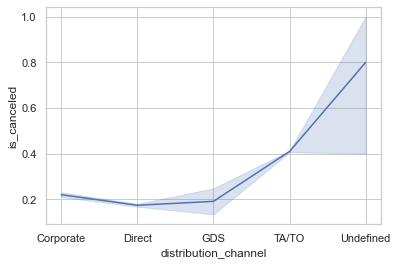

In [25]:
from numpy import mean
ax = sns.lineplot(x="distribution_channel", y="is_canceled", data=df, estimator=mean)

********************************************************************************************************

## Creating new table with ranks

In [26]:
create_statement = """create table hotel_bookings_modified as 
select *, ntile(5) OVER(ORDER BY stays_in_weekend_nights) as stays_in_week_nights_rank,
ntile(5) OVER(ORDER BY days_in_waiting_list) as day_wait_rank from HotelDemand;"""

conn = create_connection("normalized.db")
with conn:
    
        create_table(conn,create_statement,"hotel_bookings_modified")

In [27]:
conn = create_connection('normalized.db')
sql_statement = """select {0} from hotel_bookings_modified""".format("day_wait_rank");
day_wait = pd.read_sql_query(sql_statement, conn)
df['day_wait_ind']=np.where(day_wait["day_wait_rank"].isin(['3']),1,0)

In [28]:
conn = create_connection('normalized.db')
sql_statement = """select {0} from hotel_bookings_modified""".format("is_canceled")
sql_statement_1 = """select {0},{1} from hotel_bookings_modified""".format("lead_time","adr")
# sql_statement_2 = """select {0},{1},{2},{3},{4},{5},{6},{7} from hotel_bookings_modified""".format('day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
#           'distribution_channel','market_segment',
#           'prev_cancel_ind','stay_in_week_night_grp')
sql_statement_2 = """select {0},{1},{2},{3},{4},{5},{6} from hotel_bookings_modified""".format('total_of_special_requests','customer_type','reserved_room_type',
           'distribution_channel','market_segment',
           'previous_cancellations','stays_in_week_nights_rank')

day_wait = pd.read_sql_query(sql_statement, conn)
lead_col = pd.read_sql_query(sql_statement_1,conn)
col_chars = pd.read_sql_query(sql_statement_2, conn)

dep=day_wait['is_canceled']

lead_arr = lead_col['lead_time'].values.tolist()
adr_arr = lead_col['adr'].values.tolist()
col_dict = {"lead_time": lead_arr, "adr":adr_arr}
col_num = pd.DataFrame(col_dict)
        
# col_char= col_chars['day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
#           'distribution_channel','market_segment',
#           'prev_cancel_ind','stay_in_week_night_grp']
arr_1 = col_chars['total_of_special_requests'].values.tolist()
arr_2 = col_chars['customer_type'].values.tolist()
arr_3 = col_chars['reserved_room_type'].values.tolist()
arr_4 = col_chars['distribution_channel'].values.tolist()
arr_5 = col_chars['market_segment'].values.tolist()
arr_6 = col_chars['previous_cancellations'].values.tolist()
arr_7 = col_chars['stays_in_week_nights_rank'].values.tolist()
arr_dict = {'total_of_special_requests':arr_1,'customer_type':arr_2,'reserved_room_type':arr_3,
            'distribution_channel':arr_4,'market_segment':arr_5,
            'previous_cancellations':arr_6,'stays_in_week_nights_rank':arr_7}
col_char= pd.DataFrame(arr_dict)
col_char['day_wait_ind'] = df['day_wait_ind']

In [29]:
X_char_dum = pd.get_dummies(col_char, drop_first = True)

### Combining the numerical and categorical features into one dataframe

In [30]:
X_all=pd.concat([col_num,X_char_dum],axis=1, join='inner')

### Defining the feature and the label 

In [31]:
X_var=X_all
Y_var=df['is_canceled']

### Train Test split and Model building

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 7)
rf_1000.fit(X_train, y_train)

C:\Users\jadha\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=2)

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [34]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.84


In [35]:
y_pred_RF=rf_1000.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_1000.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.82


### Results

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[19312  3059]
 [10377  3069]]


Text(0.5, 257.44, 'Predicted label')

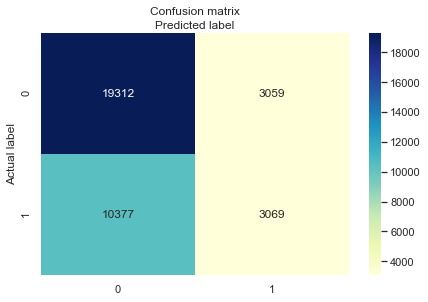

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     22371
           1       0.87      0.69      0.77     13446

    accuracy                           0.84     35817
   macro avg       0.85      0.81      0.83     35817
weighted avg       0.85      0.84      0.84     35817



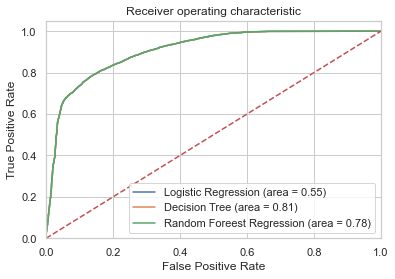

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

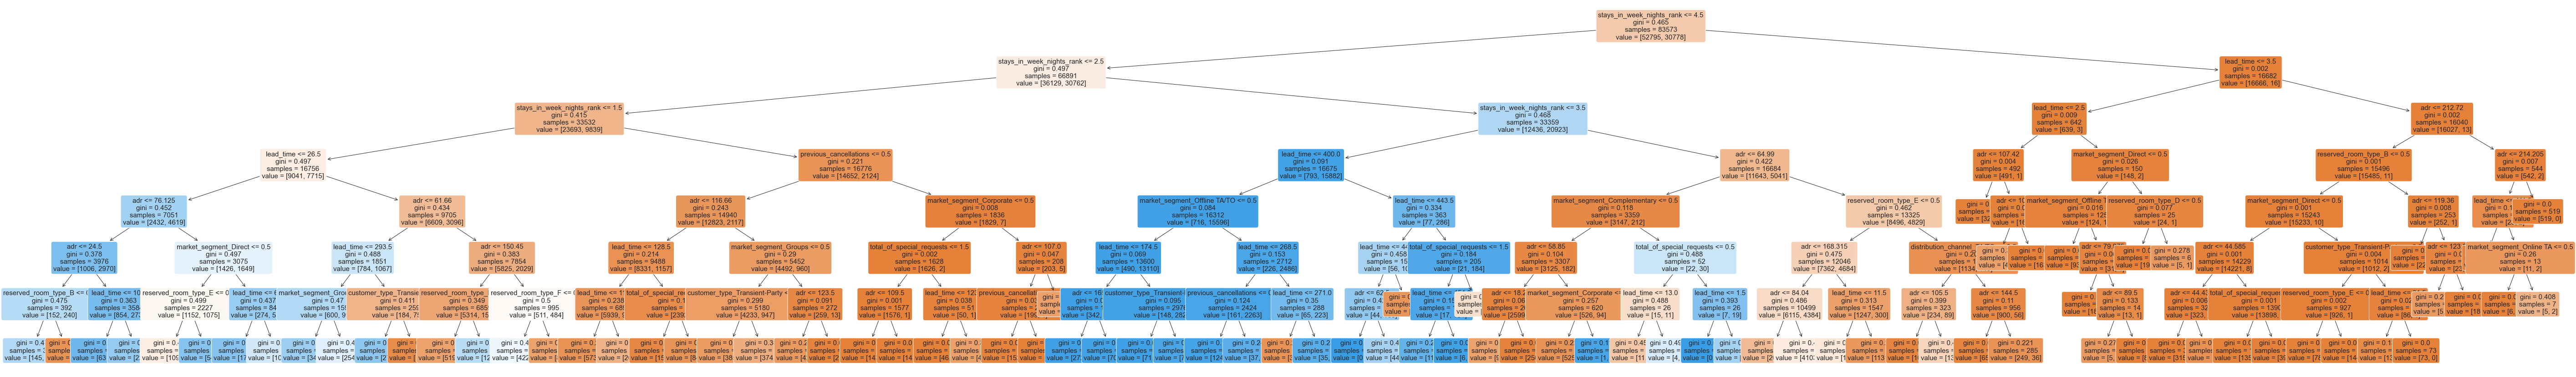

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[100,15])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()